<a href="https://colab.research.google.com/github/mahesh-keswani/pytorch-example-notebook/blob/main/3_PytorchLinearClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
# This returns the Bunch object, but we can treat it as python dictionary
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
X = data.data
Y = data.target.reshape(-1, 1) # Array of zero's and one's
print(X.shape, Y.shape)

(569, 30) (569, 1)


In [4]:
# The two classes which we are trying to classify
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [5]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
X_train = torch.from_numpy( X_train.astype(np.float32) )
X_test = torch.from_numpy( X_test.astype(np.float32) )
Y_train = torch.from_numpy( Y_train.astype(np.float32) )
Y_test = torch.from_numpy( Y_test.astype(np.float32) )

In [9]:
N, D = X_train.shape

In [10]:
model = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)

criterion = nn.BCELoss()
optimizer = torch.optim.Adam( model.parameters() )

In [11]:
EPOCHS = 1000
train_losses = []
test_losses = []

for i in range(EPOCHS):
    optimizer.zero_grad()

    outputs = model(X_train)
    loss = criterion(outputs, Y_train)
    train_losses.append( loss.item() )

    loss.backward()
    optimizer.step()

    test_predictions = model(X_test)
    test_loss = criterion(test_predictions, Y_test)
    test_losses.append(test_loss.item())

    if (i + 1) % 50 == 0:
        print(f"Epoch: {i + 1}/{EPOCHS}, Train_loss: {loss.item()}, Test_loss: {test_loss.item()}")

Epoch: 50/1000, Train_loss: 0.5905590057373047, Test_loss: 0.5695631504058838
Epoch: 100/1000, Train_loss: 0.41297104954719543, Test_loss: 0.39804568886756897
Epoch: 150/1000, Train_loss: 0.32610654830932617, Test_loss: 0.3160536587238312
Epoch: 200/1000, Train_loss: 0.2743852138519287, Test_loss: 0.26791656017303467
Epoch: 250/1000, Train_loss: 0.23940499126911163, Test_loss: 0.23564623296260834
Epoch: 300/1000, Train_loss: 0.21383345127105713, Test_loss: 0.21214377880096436
Epoch: 350/1000, Train_loss: 0.1942012459039688, Test_loss: 0.19409970939159393
Epoch: 400/1000, Train_loss: 0.1786307990550995, Test_loss: 0.17975202202796936
Epoch: 450/1000, Train_loss: 0.1659904420375824, Test_loss: 0.16805467009544373
Epoch: 500/1000, Train_loss: 0.155540332198143, Test_loss: 0.15833184123039246
Epoch: 550/1000, Train_loss: 0.14676906168460846, Test_loss: 0.15011949837207794
Epoch: 600/1000, Train_loss: 0.1393098086118698, Test_loss: 0.14308619499206543
Epoch: 650/1000, Train_loss: 0.13289263

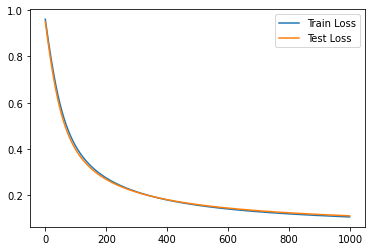

In [12]:
plt.plot(train_losses, label = "Train Loss")
plt.plot(test_losses, label = "Test Loss")
plt.legend();

In [14]:
# Now lets evaluate the accuracies
with torch.no_grad():
    # remember, the output of model is still probabilities, we need to round them up
    train_preds = np.round( model(X_train).numpy() )
    train_accuracy = np.mean( train_preds == Y_train.numpy() )
    
    test_preds = np.round( model(X_test).numpy() )
    test_accuracy = np.mean( test_preds == Y_test.numpy() )
    print(f"Train Accuracy {train_accuracy:.4f}, Test Accuracy {test_accuracy:.4f}")

Train Accuracy 0.9846, Test Accuracy 0.9825


In [16]:
# Now Saving and Loading the model
# We can see these are the actual parameters values of model, we will save these parameters values and not the 
# configuration of the architecture
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1767, -0.5103, -0.4718, -0.3432, -0.0911, -0.1008, -0.2739, -0.3713,
                       -0.1891,  0.3427, -0.2581,  0.0226, -0.4462, -0.2686,  0.0725,  0.0616,
                        0.1182, -0.3214,  0.1751,  0.2369, -0.2703, -0.2730, -0.3842, -0.3876,
                       -0.5258, -0.1296, -0.2492, -0.2067, -0.3234, -0.1847]])),
             ('0.bias', tensor([0.5025]))])

In [17]:
torch.save( model.state_dict(), 'model.pt' )

In [19]:
# Now load the model back, for that we need to define the architecture again
model2 = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)

model2.load_state_dict( torch.load('model.pt') )

<All keys matched successfully>

In [20]:
with torch.no_grad():
    train_preds = np.round( model2(X_train).numpy() )
    train_accuracy = np.mean( train_preds == Y_train.numpy() )
    
    test_preds = np.round( model2(X_test).numpy() )
    test_accuracy = np.mean( test_preds == Y_test.numpy() )
    print(f"Train Accuracy {train_accuracy:.4f}, Test Accuracy {test_accuracy:.4f}")

Train Accuracy 0.9846, Test Accuracy 0.9825
